# Getting Started - SSI in the "Real World"

We will work through the demo flow:
* Exposing your agent to the world
* Connecting the Issuer agent to Sovrin Stagingnet
* Acceptance of the Transaction Author Agreement (TAA)
* Ledgering Issuer agent DID, DIDDoc, Schema and Credential definitions to Sovrin Stagingnet
* Making a connection between Issuer Agent and an Identity Holder's Mobile SSI Wallet
* Issuing a credential to an Identity Holder's Mobile SSI Wallet
* Making a connection between Verifier Agent and an Identity Holder's Mobile SSI Wallet
* Requesting a proof from the Verifier agent to an Identity Holder's Mobile SSI Wallet
* Verifiying the presentation proof by the Verifier agent
* End of demo

In previous tutorials all infrastructure was running on your own machine, this includes the issuer agent, verifier agent, indy network and indy ledger browser. For development and learning purposes it is sufficient, however to move into the "real world" of SSI we require the agents to be exposed to the internet and furthermore for the issuer agent and verifier agent to be connected to a global public utility such as Sovrin Stagingnet.

The resulting agents in this demo are fully prepared to interact with other agents and the Sovrin Staging Net for Verifiable Credentials exchange.

## Step 1. Exposing your agent to the world

### Disclaimer regarding the use of ngrok
Both compose setups use the ngrok tunneling service to make your agent available to the outside world. One caveat of this, however, is that connections made from your docker agent will expire within 8 hours as a limitation of the ngrok free-tier. Therefore, these setups are intended for demonstration purposes only and should not be relied upon as is for production environments.

### What is `ngrok`?
Ngrok exposes local servers behind NATs and firewalls to the public internet over secure tunnels.

Visit [ngrok](https://ngrok.com/) for more information.

### What do we do with ngrok?
We use ngrok to expose the issuer and verifier agents to the internet so that SSI Mobile Wallets and other agents on the internet can communicate with our agents running on our local machine.

## Step 2. Connecting the Issuer agent to Sovrin Stagingnet

Only Issuing agents require writing to the ledger. To understand what goes onto the ledger refer to [this](https://www.evernym.com/wp-content/uploads/2017/07/What-Goes-On-The-Ledger.pdf) article.

An extract from the article:
> **Goes on Sovrin:**
    * Public DIDs and associated DID documents with verification keys and endpoints.
    * Schemas and credential definitions
    * Revocation registries
    * Agent authorisation policies
> **Does not go on Sovrin:**
    * Private DIDs
    * Private credentials
    * Consent receipts or data exchange records
    
As per the extract above, only **Issuers are required to write to the Sovrin ledger**. **Verifiers and Identity Holder don't need to write** to the Sovrin ledger, **but rather only read from the ledger**.

To connect the Issuer agent to the Sovrin Stagingnet the following is required:
* Providing the Sovrin Stagingnet Genesis file URL to the agent during startup with the `--genesis-url` startup parameter for Aca-Py. 
    * Sovrin Stagingnet genesis URL can be found [here](https://raw.githubusercontent.com/sovrin-foundation/sovrin/master/sovrin/pool_transactions_sandbox_genesis).
    * For a complete list of Aca-Py startup parameters please refer to [this](https://github.com/hyperledger/aries-cloudagent-python/blob/25b7a9c08921e67b0962c434102489884ac403b2/aries_cloudagent/config/argparse.py) link.
* Ensure that agent is exposed to the internet with `ngrok`

Both of these are already taken care off by the `example/aries-stagingnet` docker environment and in the [Part 2- Connecting Issuer Agent to Sovrin Stagingnet](http://127.0.0.1:8888/notebooks/Part%202%20-%20Connecting%20Issuer%20Agent%20to%20Sovrin%20Stagingnet.ipynb) notebook.

## Step 3. Acceptance of the Transaction Author Agreement (TAA)

Although the ledger is permissionless, before DID's have the authority to write to the ledger they must accept something called a transaction author agreement by signing it using that DID.

As a global public ledger, the Sovrin Ledger and all its participants are subject to privacy and data protection regulations such as the EU General Data Protection Regulation (GDPR). These regulations require that the participants be explicit about responsibilities for Personal Data.

To clarify these responsibilities and provide protection for all parties, the Sovrin Governance Framework Working Group developed an agreement between Transaction Authors and the Sovrin Foundation. It ensures that users are aware of and consent to the fact that all data written to the Sovrin Ledger cannot be removed, even if the original author of the transaction requests its removal. - source: https://www.evernym.com/taa/

To clarify these responsibilities and provide protection for all parties, the Sovrin Governance Framework Working Group developed an agreement between Transaction Authors and the Sovrin Foundation. The TAA can be found at Sovrin.org. It ensures that users are aware of and consent to the fact that all data written to the Sovrin Ledger cannot be removed, even if the original author of the transaction requests its removal.

The TAA outlines the policies that users must follow when interacting with the Sovrin Ledger. When a user’s client software is preparing a transaction for submission to the network, it must include a demonstration that the user had the opportunity to review the current TAA and accept it. This is done by including some additional fields in the ledger write transaction: 

* A hash of the agreement
* A date when the agreement was accepted, and
* A string indicating the user interaction that was followed to obtain the acceptance.

The Indy client API used by Sovrin has been extended to allow users to review current and past agreements and to indicate acceptance through an approved user interaction pattern. - source: https://sovrin.org/preparing-for-the-sovrin-transaction-author-agreement/

For more details on TAA please read more at the following links:
* [Preparing for the Sovrin Transaction Author Agreement](https://sovrin.org/preparing-for-the-sovrin-transaction-author-agreement/)
* [How the recent approval of the Sovrin Governance Framework v2 affects Transaction Authors
](https://sovrin.org/how-the-recent-approval-of-the-sovrin-governance-framework-v2-affects-transaction-authors/)
* [TAA v2](https://github.com/sovrin-foundation/sovrin/blob/master/TAA/TAA.md)
* [TAA Acceptance Mechanism List (AML)](https://github.com/sovrin-foundation/sovrin/blob/master/TAA/AML.md)

The TAA is handled in the [Part 2- Connecting Issuer Agent to Sovrin Stagingnet](http://127.0.0.1:8888/notebooks/Part%202%20-%20Connecting%20Issuer%20Agent%20to%20Sovrin%20Stagingnet.ipynb) notebook.

## Step 4. Ledgering Issuer agent DID, DIDDoc, Schema and Credential definitions to Sovrin Stagingnet

The Issuer agent will have no DID created at startup. 
This is to show the process of:
* generating a DID
* writing the newly created DID to Sovrin Stagingnet through the [Sovrin Selfserve Portal](https://selfserve.sovrin.org)
* accepting the TAA
* setting the agents public DID.

All this is achieved in the [Part 2- Connecting Issuer Agent to Sovrin Stagingnet](http://127.0.0.1:8888/notebooks/Part%202%20-%20Connecting%20Issuer%20Agent%20to%20Sovrin%20Stagingnet.ipynb) notebook.

## Step 5. Making a connection between Issuer Agent and an Identity Holder's Mobile SSI Wallet

To make a connection with an identity holders wallet we must create a connection invitation and present the QR code to be scanned by the identity holders wallet. The identity holder scan this QR code and then communicate back to the agent through the exposed ngrok endpoint.

Once a connection is in an `active state`, the agent and the identity holders mobile wallet now have a secure pairwise relationship over which they can exchange verifiable credentials.

An example of a QR code can be seen below.

All this is achieved in the [Part 3 - Issuer](http://127.0.0.1:8888/notebooks/Part%203%20-%20Issuer.ipynb) notebook.

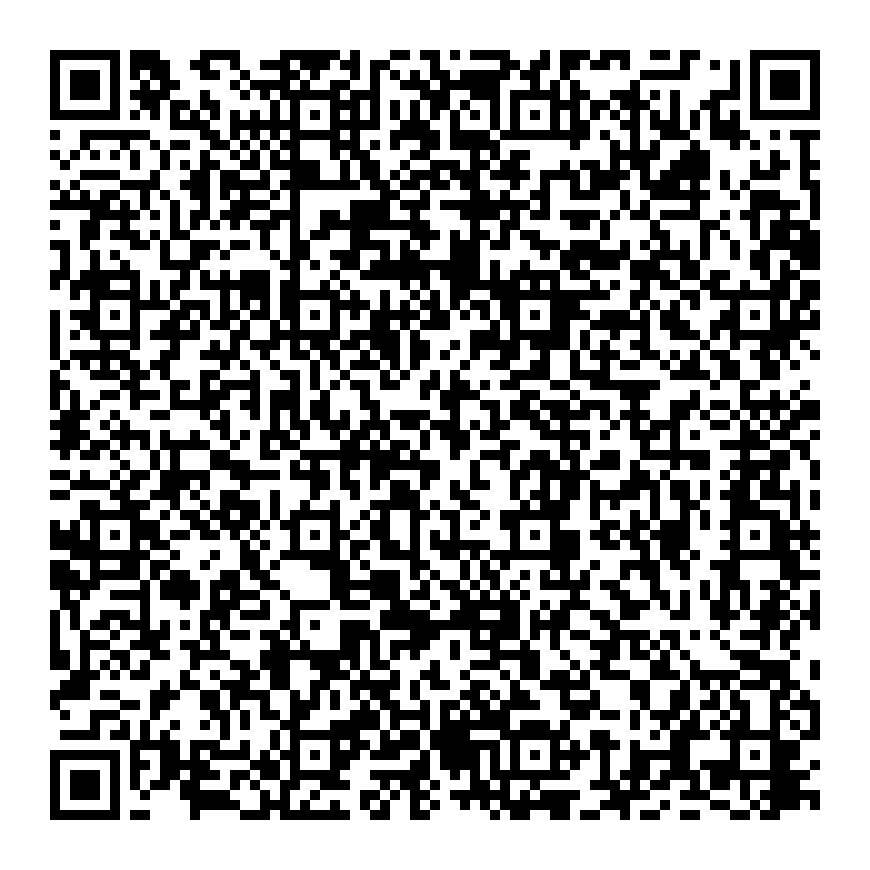

In [3]:
from IPython.display import Image
Image(width=400, filename='./issuer_agent_invite_QRcode.png')

## Step 6. Issuing a credential to an Identity Holder's Mobile SSI Wallet

Once a connection is established between the Issuer agent and the identity holder's mobile wallet we are able to issue a credential to the identity holder.

We will issue a credential to the identity holder consisting of the following attributes:
~~~~
credential_attributes = [
    {"name": "fullname", "value": name},
    {"name": "skill", "value": "PyDentity SSI Ninja"},
    {"name": "age", "value": age}
]
~~~~

The Issuer agent will be asked to input the identity holder's full name and age which will be used to populate the schema above with the identity holders attribute information.

Once this step is complete the identity holder will have a credential in his wallet that will be requested as a proof by the verifier agent.

## Step 7. Making a connection between Verifier Agent and an Identity Holder's Mobile SSI Wallet

To make a connection with an identity holders wallet we must create a connection invitation and present the QR code to be scanned by the identity holders wallet. The identity holder scan this QR code and then communicate back to the agent through the exposed ngrok endpoint.

Once a connection is in an `active state`, the agent and the identity holders mobile wallet now have a secure pairwise relationship over which they can exchange verifiable credentials.

All this is achieved in the [Part 4 - Verifier](http://127.0.0.1:8889/notebooks/Part%204%20-%20Verifier.ipynb) notebook.

## Step 8. Requesting a proof from the Verifier agent to an Identity Holder's Mobile SSI Wallet

The verifier will request a proof from the identity holder for the following attributes:
* fullname"
* "skill"
* "country" - self-attested
* "age" - as a predicate range proof to determine if the identity holder is older than 21

Below is the proof request JSON object that will be used to generate the proof request.
As can be seen from the JSON object below, we included restrictions that only credentials issued against a specific `schema_id = 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1` will be allowed.

If you decided to ledger your own schema as part of Section 3c in [Part 3 - Issuer](http://127.0.0.1:8888/notebooks/Part%203%20-%20Issuer.ipynb) notebook you will need to update the `schema_id` in Section 5a in [Part 4 - Verifier](http://127.0.0.1:8889/notebooks/Part%204%20-%20Verifier.ipynb) notebook.
~~~~
schema_id = 'EuEtnVakYFyBtGFT1nHYtH:2:SSI PyDentity Tutorial:0.0.1'

print("Request proof of Fullname and Age range from Identity Holder")
#Set some variables

revocation = False
SELF_ATTESTED = True
exchange_tracing = False

#Enable this to ask for attributes to identity a user
#TODO - change restriction to schemaId or credentialId

req_attrs = [
    {"name": "fullname", "restrictions": [{"schema_id": schema_id}]},
    {"name": "skill", "restrictions": [{"schema_id": schema_id}]},
]

if revocation:
    req_attrs.append(
        {
            "name": "skill",
            "restrictions": [{"schema_id": schema_id}],
            "non_revoked": {"to": int(time.time() - 1)},
        },
    )

if SELF_ATTESTED:
    # test self-attested claims
    req_attrs.append({"name": "country"},)

#Set predicates for Zero Knowledge Proofs
req_preds = [
    # test zero-knowledge proofs
    {
        "name": "age",
        "p_type": ">=",
        "p_value": 21,
        "restrictions": [{"schema_id": schema_id}],
    }
]
~~~~


## Step 9. Verifiying the presentation proof by the Verifier agent

Once the proof request is processed by the identity holder and send to the verifier agent the last step is to verify the credential received. For this the verifier agent will be required to read from the Sovrin Stagingnet the DID document for the Issuer agent to verify the authenticity of the presented credential.

This is achieved in section 6 of the [Part 4 - Verifier](http://127.0.0.1:8889/notebooks/Part%204%20-%20Verifier.ipynb) notebook.

## Step 9. End of demo

Well done on completing the PyDentity SSI tutorials! 

You should now have a good understanding of SSI from a development perspective using `Aca-Py`, `Aries-basic-controller` and `Python`.